# COMPSCI 682 – FINAL PROJECT
### Problem: Expanded Classification

Below **Imports**

In [1]:
import os
import PIL
import cv2

import random
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# TORCH
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F

from sklearn.cluster import KMeans


Below **Preproccess Data** 


**Step 0.1**: Preprocesses and reorganize the dataset

The dataset images are denoted as follows (*from the Dataset website*):


> *The name of the images has the following format: XXXXXX_Y.jpg. XXXXXX is the identifier of the placemark. There are total number of 10343 placemarks in this dataset, so XXXXXX ranges from 000001 to 10343.
Y is the identifier of the view. 1, 2, 3 and 4 are the side views and 5 is the upward view. 0 is the view with markers overlaid (explained above). Thus, there are total number of 6 images per placemark.*

In this version, **we append two images from the same perspective together as one image**.


(6597, 3, 200, 100)
(6597, 2)
(6597, 2)


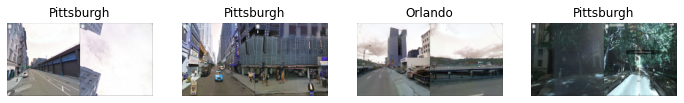

In [2]:
from utils.data_utils import Panoramic_Classification


pitts_folder = "part1"
ny_folder = "part5"

data_folders = [pitts_folder, ny_folder]
class_data = Panoramic_Classification()
class_data.load_data(folder_paths=data_folders)
class_data.label_data()
class_data.sample_dataset(4)


**Step 1.** Preprocesses Data for Model

In [3]:
# CONVERT numpy array to TENSOR
X = class_data.data
y = class_data.labels

print("num 0s [Pittsburgh]: ", np.sum(y == 0))
print("num 1s [Orlando]: ", np.sum(y == 1))
print("num 2s [New York]: ", np.sum(y == 2))
print("data and labels equal: ", len(X) == len(y))

print(X.shape)

num 0s [Pittsburgh]:  3291
num 1s [Orlando]:  3297
num 2s [New York]:  9
data and labels equal:  True
(6597, 3, 200, 100)


**Initialize** Data Loaders

In [4]:
from utils.torch_utils import process_data

labels_to_exclude = [2]
loader_train, loader_val = process_data(X, y, exclude_labels=labels_to_exclude)

num 0s [Pittsburgh]:  3291
num 1s [Orlando]:  3297
num 2s [New York]:  0


/Users/stephen/Desktop/School/Graduate/Semester 1 [Spring 2022]/COMPSCI 682 – Neural Networks/Final Project.nosync/src/utils/torch_utils.py:42: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  new_labels = np.array(new_data)[:,1]
/Users/stephen/Desktop/School/Graduate/Semester 1 [Spring 2022]/COMPSCI 682 – Neural Networks/Final Project.nosync/src/utils/torch_utils.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must spe

**Step 2.** Build Convolutional Model

In [7]:
from models.cnn_classifier import CNN_Classifier

cnn_class = CNN_Classifier(num_classes=2, output_dims=5670)
cnn_class.set_up_train(loader_train, loader_val)

**Step 3**. Train Model

In [ ]:
optimizer = optim.SGD(cnn_class.model.parameters(), lr=0.0008,
                     momentum=0.9, nesterov=True)

evals = cnn_class.train_model(optimizer, epochs=10, lr=0.0008, print_every=10)